In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import scipy
import cPickle
%matplotlib inline

### Loading of the data
The images can be obtained from: http://www.cs.toronto.edu/~kriz/cifar.html The 32x32 images are of have the following classes:

In [2]:
names = ['plane','auto','bird','cat','deer','dog','frog','horse','ship','truck']

In [3]:
def unpickle(file):
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    data = dict['data']
    imgs = np.transpose(np.reshape(data,(-1,32,32,3), order='F'),axes=(0,2,1,3)) #order batch,x,y,color
    y = np.asarray(dict['labels'], dtype='uint8')
    return y, imgs

In [4]:
y, imgs = unpickle('/home/dueo/Dropbox/data/CIFAR-10/cifar-10-batches-py/test_batch')

## Loading the features
The features have been extracted using a inception model V3 using the python script 'cifar-10_experiment.py'. We load the test data. For training we just take the first batch (we don't have to learn the features).

In [5]:
d = np.load('test_batch.npz')
y_test = d['y']
rep_test  = d['representations']

### t-SNE Visualisation

In [7]:
from tsne import bh_sne
N = 10000
Y = bh_sne(np.asarray(rep_test[0:N], dtype='float64'))

In [8]:
min_1 = Y[:,0].min()
max_1 = Y[:,0].max()
min_2 = Y[:,1].min()
max_2 = Y[:,1].max()
Yn = Y[:]
Yn[:,0] = (Y[:,0] - min_1) / (max_1 - min_1) 
Yn[:,1] = (Y[:,1] - min_2) / (max_2 - min_2) 

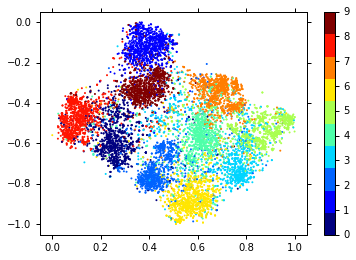

In [10]:
plt.scatter(Yn[:, 1], -Yn[:, 0], c=y_test[0:N],cmap=plt.cm.get_cmap("jet", 10), s=4, edgecolors='none')
plt.colorbar(ticks=range(10))
plt.savefig('imgs/cifar_tSNE.jpg')

In [12]:
RES = 3000
can = np.zeros((RES,RES,3),dtype='uint8')

In [13]:
for i in range(10000):
    y_1 = int(Yn[i,0] * (RES - 32))
    y_2 = int(Yn[i,1] * (RES - 32))
    can[y_1:y_1+32,y_2:y_2+32,:] = imgs[i]

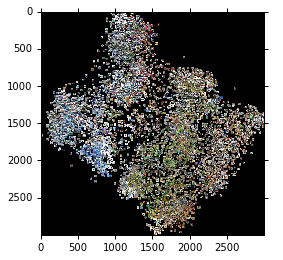

In [15]:
plt.imshow(can)

scipy.misc.imsave('imgs/outfile_3000.jpg', can)